In [1]:
#Importing Libraries :
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
#Extracting DataFrame From Web :
import pandas_datareader as web

In [2]:
import yfinance as yf
#Stock Symbol Used : Alphabet A Inc - > Google
# From 1 April 2021 to 30 July 2023
#This data is full collection of all stock features from Yahoo's Stock Market
def UpdateCSV(stock='GOOGL', update=True):
    """
    stock  : (STR) Symbol of the stock. def "GOOGL"
    update : (BOOL) to update csv. def TRUE

    Updates DATA.csv at root by default
    returns stock info as well
    """
    
    df_g = yf.download(stock, start='2021-07-01', end='2023-07-01')
    
    if update:
        df_g.to_csv("DATA.csv")
    
    return df_g

# Call the function to update the CSV
if __name__ == "__main__":
    UpdateCSV()


[*********************100%%**********************]  1 of 1 completed


In [41]:
#The 'DATE' Column has already been parsed to dates , so that we can easily access it as a timestamp object.

# DEMO Reading the CSV
df_g = pd.read_csv("DATA.csv") # read csv
df_g["Date"] = pd.to_datetime(df_g["Date"]) # covert date from string
df_g = df_g.set_index("Date") # set date as index

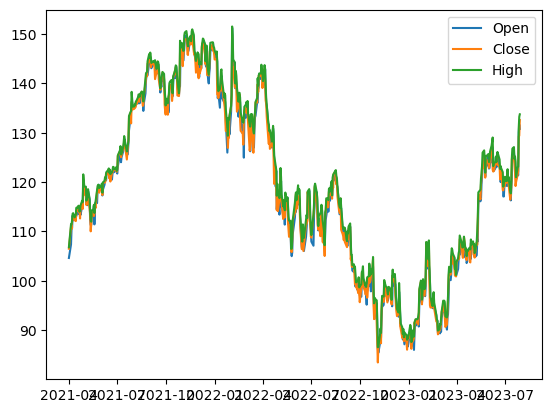

In [42]:
plt.plot(df_g.Open, label = "Open")
plt.plot(df_g.Close, label = "Close")
plt.plot(df_g.High, label = "High")
plt.legend()
plt.show()

In [43]:
df_g.describe()

,Open,High,Low,Close,Adj Close,Volume
count,585.000000,585.000000,585.000000,585.000000,585.000000,5.850000e+02
mean,118.762973,120.171681,117.403666,118.807143,118.807143,3.322494e+07
std,17.367217,17.274796,17.230922,17.239646,17.239646,1.348507e+07
min,85.400002,86.519997,83.339996,83.430000,83.430000,9.701400e+06
25%,105.059998,106.540001,103.970001,105.320000,105.320000,2.445800e+07
50%,118.273003,119.285500,116.849998,118.134003,118.134003,3.039330e+07
75%,134.878494,136.244003,133.218506,134.726501,134.726501,3.757120e+07
max,151.250000,151.546494,148.899002,149.838501,149.838501,1.232000e+08


In [44]:
df_g.shape  #Indicating Number Of days and features -> 585 days and 6 stock features

(585, 6)

## Array Conversion :

In [45]:

def ConvToNpaArr(df):
    """
    Df : pd.DataFrame
    Converting to Array First for Model PreProcessing :
    """
    return df.values


## Normalising Of Data :

In [46]:
#Importing MinMax Scaler :
from sklearn.preprocessing import MinMaxScaler

def NormalisingData(arr):
    """
    arr : arr to be scaled

    To Scale All The data points between  0 to 1

    """
    scaler=MinMaxScaler(feature_range=(0,1))
    scaled_data=scaler.fit_transform(arr)
    return scaled_data
    

[[0.29176161 0.31168067 0.32385339 0.34722961 0.34722961 0.26589403]
 [0.33344719 0.38337456 0.36486981 0.41437463 0.41437463 0.34193021]
 [0.38186783 0.38261334 0.40802181 0.40707134 0.40707134 0.22501247]
 [0.38352313 0.39530042 0.4166476  0.42948567 0.42948567 0.12716104]
 [0.42217154 0.41628421 0.43945909 0.43806891 0.43806891 0.16707343]
 [0.408079   0.41796047 0.43507375 0.45330794 0.45330794 0.14488813]
 [0.41466971 0.4048273  0.42787413 0.43369452 0.43369452 0.13500255]
 [0.41229307 0.40988681 0.43948958 0.44108052 0.44108052 0.14079997]
 [0.42477596 0.41293169 0.43412809 0.43165403 0.43165403 0.09956599]
 [0.42061508 0.43489974 0.44568257 0.46428539 0.46428539 0.17156687]]


[]

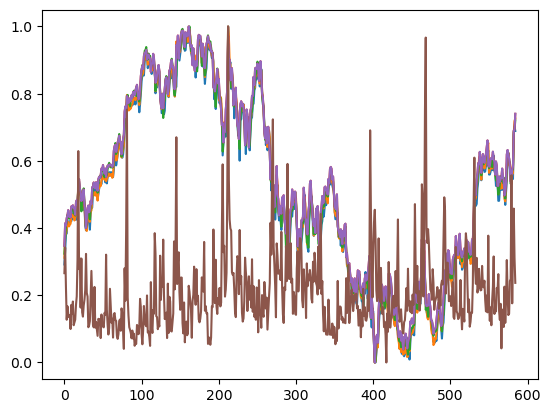

In [47]:
# convert the DataFrame to array and pass that for normalization

Scaled_data = NormalisingData( ConvToNpaArr( df_g ))
print(Scaled_data[:10]) # Displaying only top 10 
plt.plot(Scaled_data)
plt.plot()

## Train-Test split

In [49]:
train_ind = int(0.8*len(df_g)) # 20:80 split
train_scaled_data = Scaled_data[:train_ind] 
test_scaled_data = Scaled_data[train_ind:]

In [50]:
print("Size of Train set",len(train_scaled_data),"\nSize of Test set" , len(test_scaled_data)) 

Size of Train set 468 
Size of Test set 117
